Colunas do DataFrame: ['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Country', 'Age', 'Gender', 'Device', 'Plan Duration']

Primeiras linhas do DataFrame:
   User ID Subscription Type  Monthly Revenue   Join Date Last Payment Date  \
0        1             Basic               10  15/01/2022        10/06/2023   
1        2           Premium               15  05/09/2021        22/06/2023   
2        3          Standard               12  28/02/2023        27/06/2023   
3        4          Standard               12  10/07/2022        26/06/2023   
4        5             Basic               10  01/05/2023        28/06/2023   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone     17 Months  
1          Canada   35  Female      Tablet     22 Months  
2  United Kingdom   42    Male    Smart TV      4 Months  
3       Australia   51  Female      Laptop     12 Months  
4         Germany   33    Male  Sma

<ipython-input-5-80e630fc3a72>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='Set2')


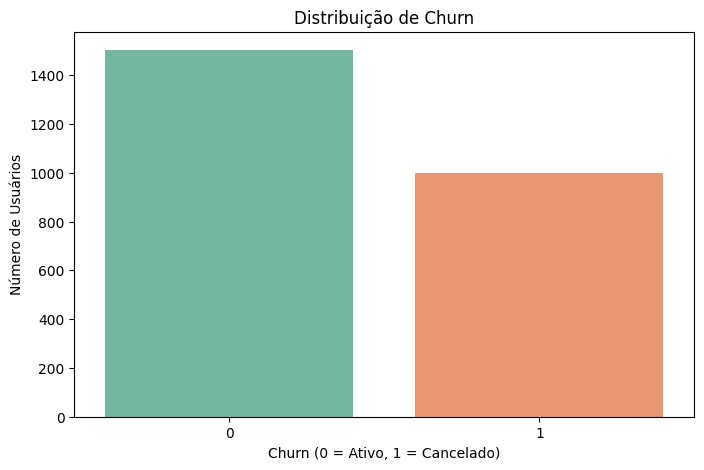

In [ ]:
# Importando as libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

# Carregar os dados
df = pd.read_csv('https://raw.githubusercontent.com/Flavio-98/projeto_aplicado_II/main/data/Netflix%20Userbase.csv', delimiter=';')

# Limpar espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Conferir as colunas e visualizar o início do DataFrame
print("Colunas do DataFrame:", df.columns.tolist())
print("\nPrimeiras linhas do DataFrame:")
print(df.head())

# Conversão de datas
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d/%m/%Y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d/%m/%Y')

# Variável de churn (com referência 01/08/2023 e 30 dias para churn)
today = pd.to_datetime('2023-08-01')
df['days_since_last_payment'] = (today - df['Last Payment Date']).dt.days
df['churn'] = np.where(df['days_since_last_payment'] > 30, 1, 0)

## Análise Exploratória com Gráficos (EDA)

### 1. Distribuição de Churn

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Distribuição de Churn')
plt.xlabel('Churn (0 = Ativo, 1 = Cancelado)')
plt.ylabel('Número de Usuários')
plt.show()

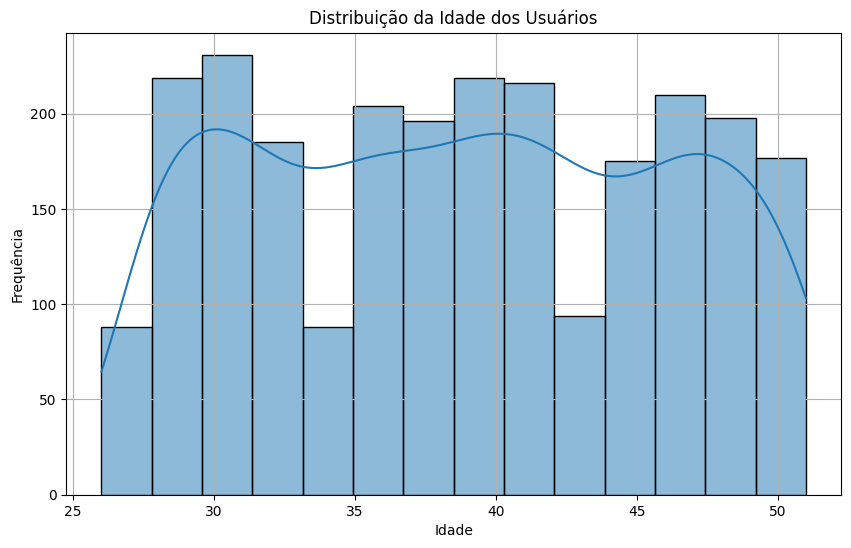

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribuição da Idade dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid()
plt.show()

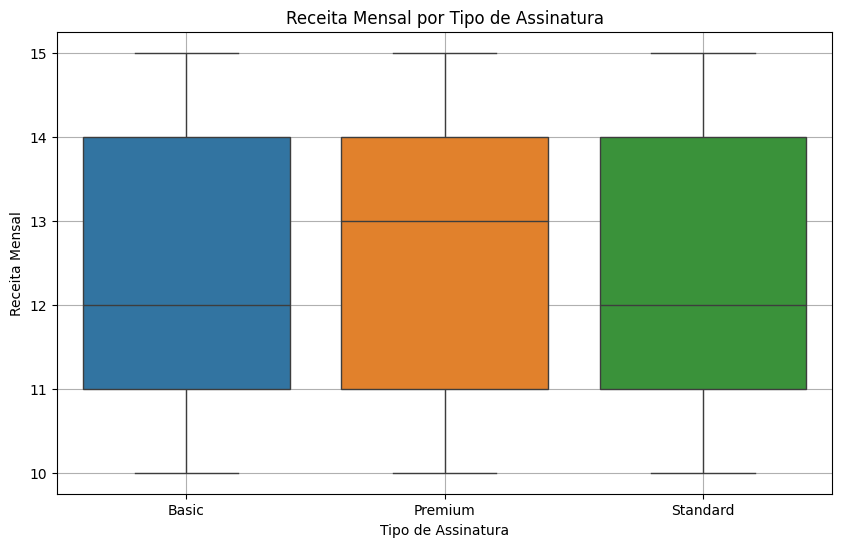

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Subscription Type', y='Monthly Revenue',
             hue='Subscription Type', legend=False)
plt.title('Receita Mensal por Tipo de Assinatura')
plt.xlabel('Tipo de Assinatura')
plt.ylabel('Receita Mensal')
plt.grid()
plt.show()

<ipython-input-8-55f09b290ed1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Subscription Type', palette='viridis')


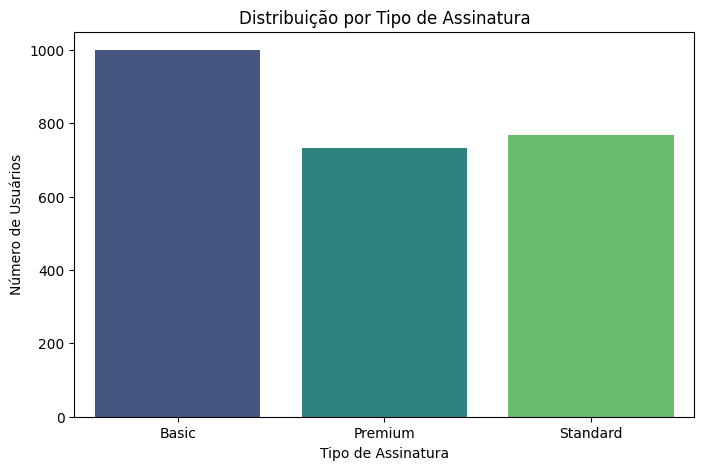

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Subscription Type', palette='viridis')
plt.title('Distribuição por Tipo de Assinatura')
plt.xlabel('Tipo de Assinatura')
plt.ylabel('Número de Usuários')
plt.show()

<ipython-input-9-a69d06ab3047>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_countries, x='Country', order=top_n_countries, palette='mako')


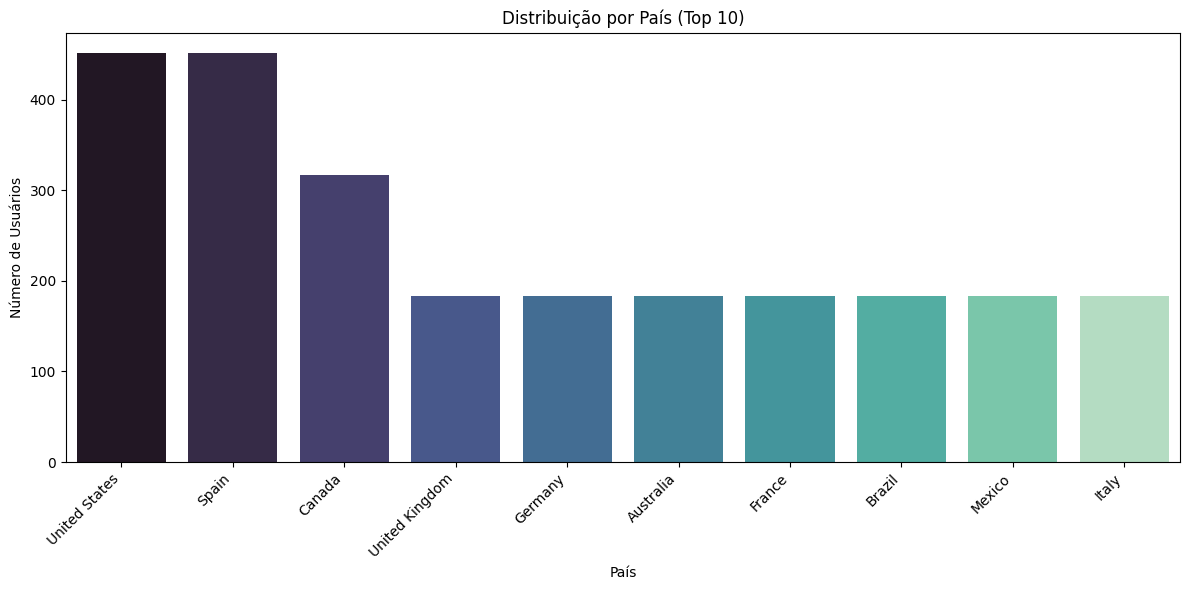

In [ ]:
top_n_countries = df['Country'].value_counts().nlargest(10).index
df_top_countries = df[df['Country'].isin(top_n_countries)]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_countries, x='Country', order=top_n_countries, palette='mako')
plt.title(f'Distribuição por País (Top {len(top_n_countries)})')
plt.xlabel('País')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-10-71d946d85c78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


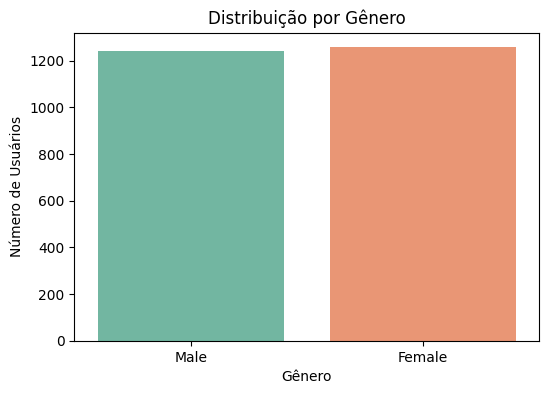

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Usuários')
plt.show()

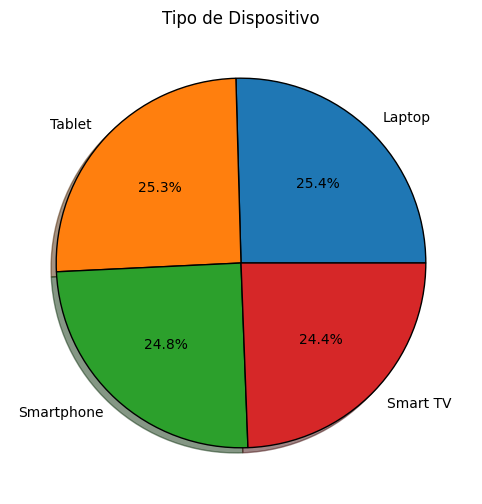

In [ ]:
devices = df["Device"].value_counts().reset_index()
plt.figure(figsize = (12,6))
plt.title("Tipo de Dispositivo")
names = devices["Device"]
plt.pie(devices["count"], labels = names, autopct = "%1.1f%%",
        wedgeprops = {"edgecolor" : "black"}, shadow = True);
plt.show()

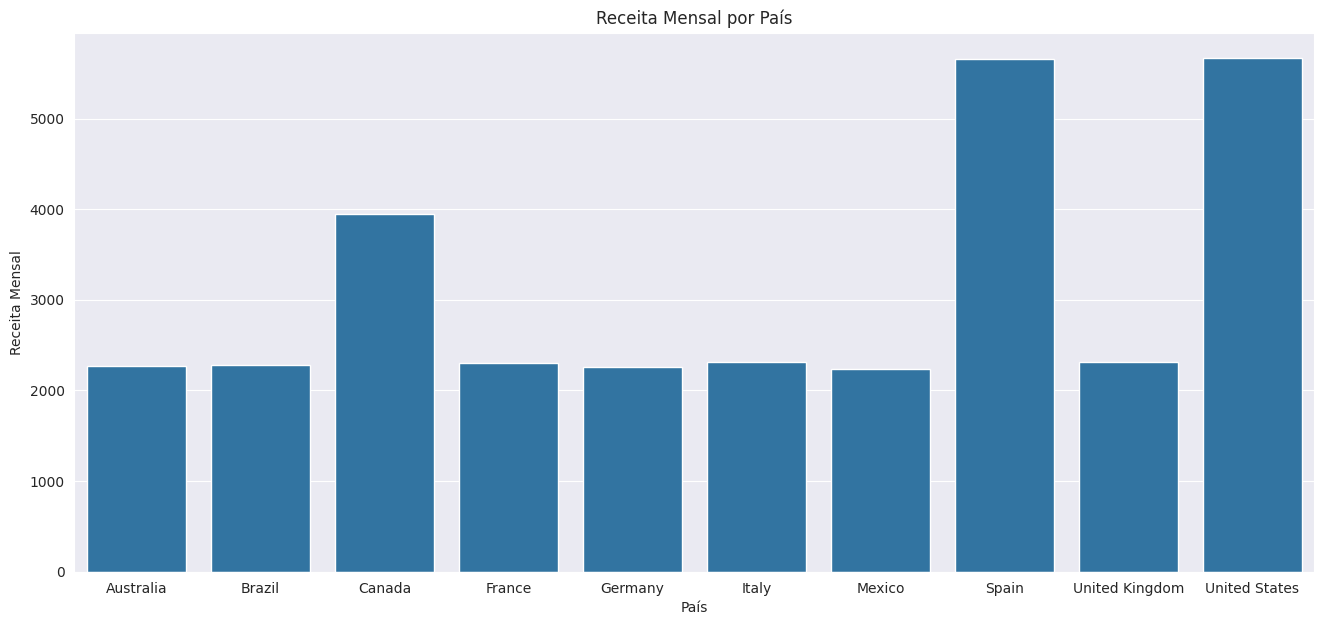

In [ ]:
sns.set_style("darkgrid")
grouped_df = df.groupby('Country')['Monthly Revenue'].sum().reset_index()
plt.figure(figsize = (16,7))
plt.title("Receita Mensal por País")
plt.xlabel('País')
plt.ylabel('Receita Mensal')
sns.barplot(x = grouped_df.Country, y = grouped_df["Monthly Revenue"]);
plt.show()

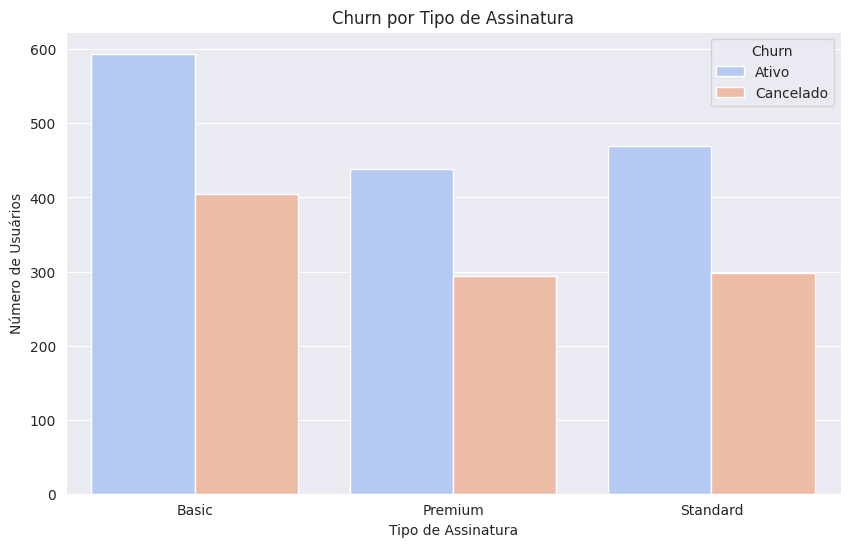

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Subscription Type', hue='churn', palette='coolwarm')
plt.title('Churn por Tipo de Assinatura')
plt.xlabel('Tipo de Assinatura')
plt.ylabel('Número de Usuários')
plt.legend(title='Churn', labels=['Ativo', 'Cancelado'])
plt.show()

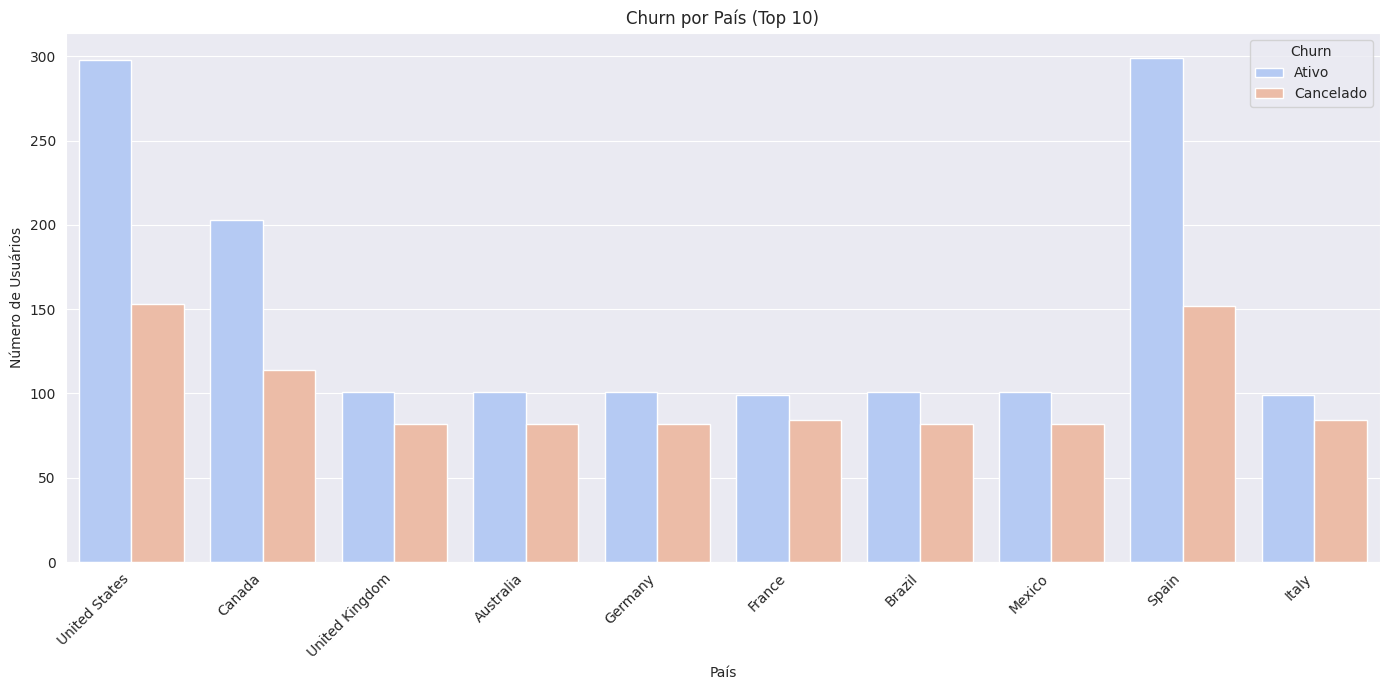

In [ ]:
top_n_countries = df['Country'].value_counts().nlargest(10).index
df_top_countries = df[df['Country'].isin(top_n_countries)]
plt.figure(figsize=(14, 7))
sns.countplot(data=df_top_countries, x='Country', hue='churn', palette='coolwarm')
plt.title(f'Churn por País (Top {len(top_n_countries)})')
plt.xlabel('País')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['Ativo', 'Cancelado'])
plt.tight_layout()
plt.show()

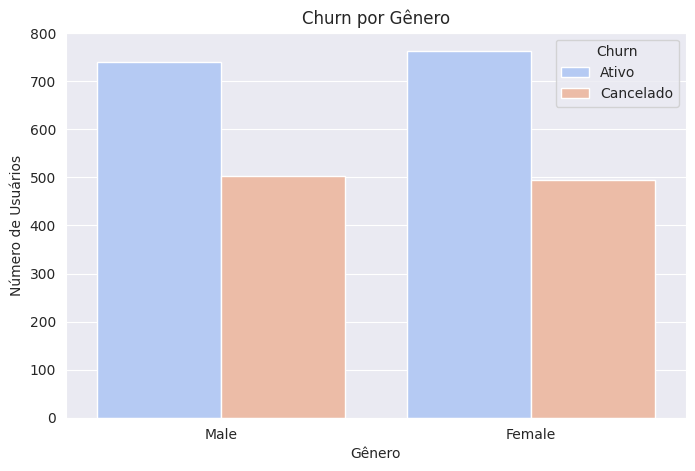

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='churn', palette='coolwarm')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Usuários')
plt.legend(title='Churn', labels=['Ativo', 'Cancelado'])
plt.show()

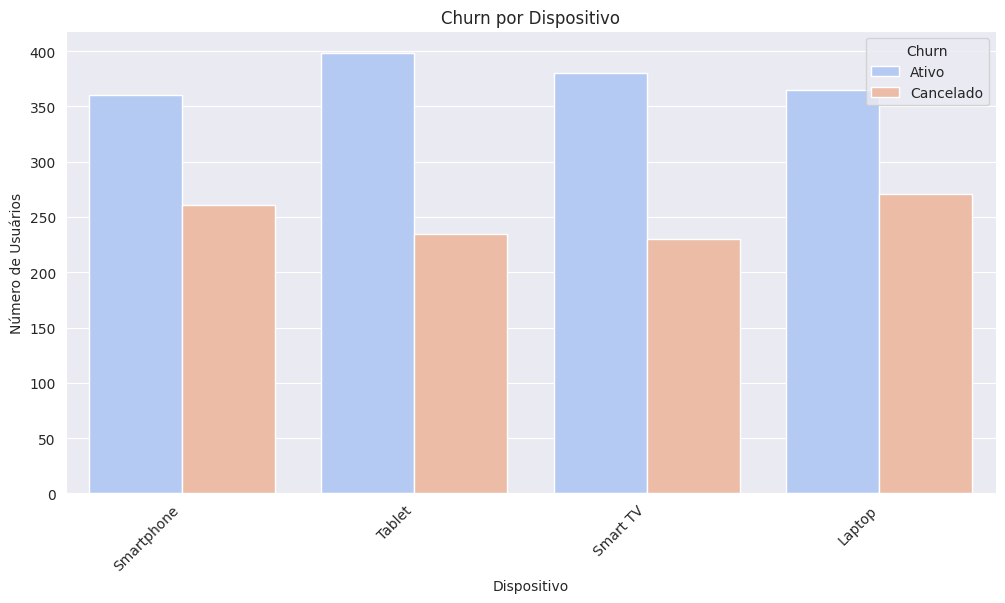

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Device', hue='churn', palette='coolwarm')
plt.title('Churn por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Número de Usuários')
plt.legend(title='Churn', labels=['Ativo', 'Cancelado'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Selecionando features
features = ['Subscription Type', 'Monthly Revenue', 'Country', 'Age', 'Gender', 'Device']
X = df[features]
y = df['churn']

# Pré-processamento variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicando SMOTE para balancear o treino
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Inicializar e treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_res, y_train_res)

# Fazer as previsões no conjunto de teste
y_pred = model.predict(X_test)

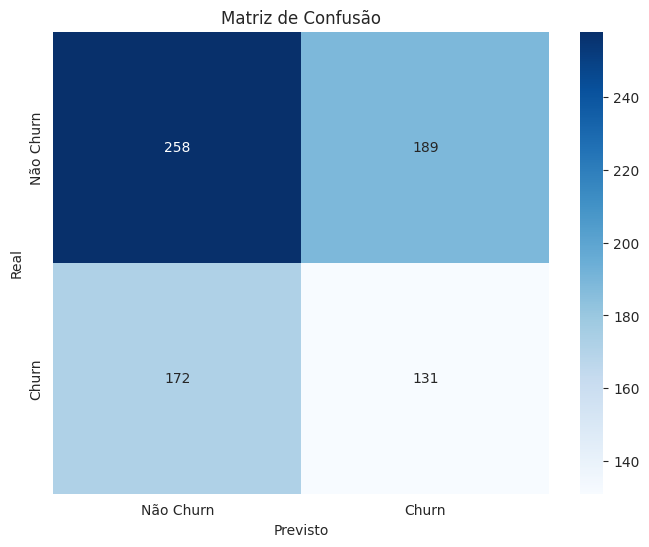

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

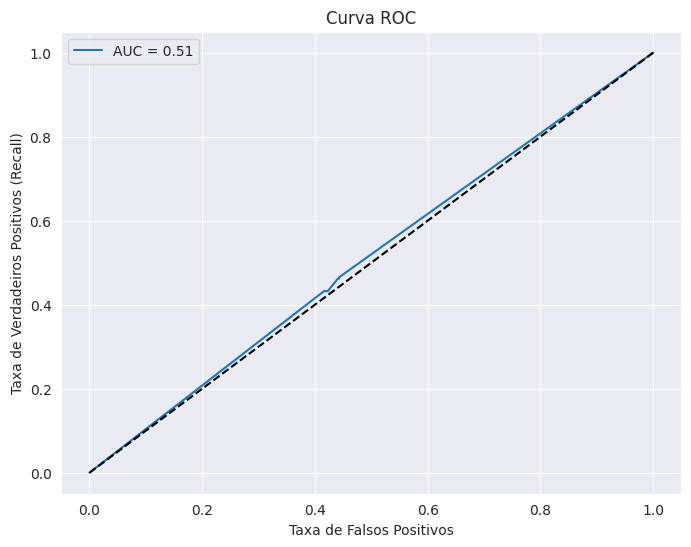

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend()
plt.show()

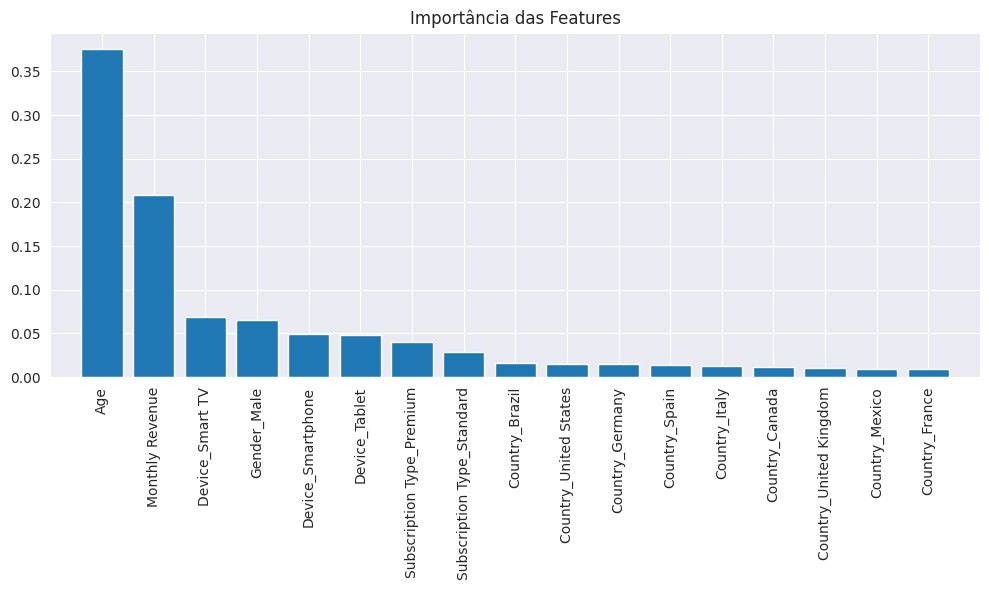

In [ ]:
importances = model.feature_importances_
feature_names = X_train_res.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.bar(range(X_train_res.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train_res.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlim([-1, X_train_res.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n--- Métricas de Avaliação ---")
print(f"Acurácia: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


--- Métricas de Avaliação ---
Acurácia: 51.87%
Precision: 40.94%
Recall: 43.23%
F1-Score: 42.05%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       447
           1       0.41      0.43      0.42       303

    accuracy                           0.52       750
   macro avg       0.50      0.50      0.50       750
weighted avg       0.52      0.52      0.52       750

